# Inferential Statistics and Tests for Proportions

In [1]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm, binom

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

## Introdution to Inference

In the previous chapters, we developed the main ideas of Statistics and Probability. In this chapter, we start with the main topics of Inferential Statistics, which make inferences about the entire population from the available sample data.

For example, many polling agencies (Pew, Gallup, etc.) conduct regular presidential approval polls. A sample of approximately 1000–2000 people is randomly selected. A sample proportion $\hat{p}$ estimates the true population proportion $p$.
Consider a particular poll of sample size $n = 1600$ with 660 approving presidential performance. Then the sample proportion is:
$\hat{p} = \text{yes}/\text{total} = 660/1600 = 0.4125$ — **point estimate**.
To find the true population proportion $p$, we would need to conduct a **census** of, say, $N = 250$ million people, which is not realistic. However, $\hat{p}$ approximates $p$.

A different random sample of the same size would produce a slightly different sample proportion, say $\hat{p} = 665/1600 = 0.416$. Variation in this point estimate from one sample to another is quantified by **sampling error**.
Note that an **unbiased simple random sample** is always assumed to avoid any systematic error.

To understand the behavior of the **sampling error**, let's simulate its variation with a known population approval rating of $p = 0.41$. It is not known in reality, but it is set to this particular value for simulation purposes.

numYes, numNo = 102500000.0, 147500000.0
pvbar, pvsd1 = 0.4101, 0.0123


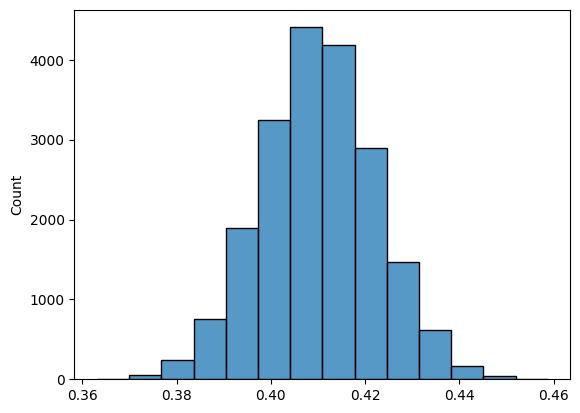

In [4]:
p = 0.41 # true population proportion
N = 250000000 # population size
n = 1600 # sample size
numsamples = 20000 # number of samples in the simulation
numYes = p*N
numNo = (1-p)*N
print('numYes, numNo = {:.1f}, {:.1f}'.format(numYes, numNo))

possible_entries = np.concatenate((np.repeat(1,numYes), np.repeat(0,numNo)))
pv = np.repeat(0.0,numsamples) # sample proportions

for j in range(numsamples):
    # resample below produces a SIMPLE RANDOM SAMPLE!!!
    onesample = resample(possible_entries, n_samples=n, replace=True)
    pv[j] = np.sum( onesample == 1) / n

sns.histplot(pv,bins=14); # create histogram of sample proportions

pvbar = np.mean(pv) # mean of sample proportions
pvsd1 = np.std(pv,ddof=1) # standard deviation of sample proportions
print('pvbar, pvsd1 = {:.4f}, {:.4f}'.format(pvbar, pvsd1))

From the Figure above, the distribution of sample proportions (**sampling distribution**) is symmetric and bell-shaped (*Normal distribution*). The center (*mean*) of this distribution is almost the same as the true population proportion $p = 0.41$. The spread of the sampling distribution (its standard deviation) is called the **standard error (SE)** and is computed as well. 
Only one sample out of the entire population is really taken, so such a sampling distribution is not observed, but it provides invaluable information about the properties of the point estimate.

If a smaller sample size $n = 400$ is taken, the sampling distribution is still bell-shaped and centered at the same true population proportion, but the distribution is more spread out, as shown in the Figure below.

numYes, numNo = 102500000.0, 147500000.0
pvbar, pvsd1 = 0.4101, 0.0246


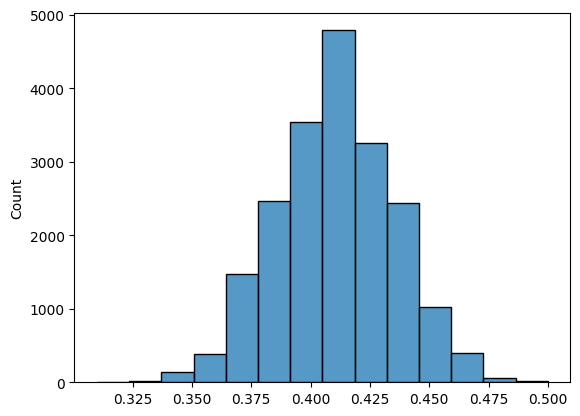

In [5]:
p = 0.41 # true population proportion
N = 250000000 # population size
n = 400 # sample size
numsamples = 20000 # number of samples in the simulation
numYes = p*N
numNo = (1-p)*N
print('numYes, numNo = {:.1f}, {:.1f}'.format(numYes, numNo))

possible_entries = np.concatenate((np.repeat(1,numYes), np.repeat(0,numNo)))
pv = np.repeat(0.0,numsamples) # sample proportions

for j in range(numsamples):
    # resample below produces a SIMPLE RANDOM SAMPLE!!!
    onesample = resample(possible_entries, n_samples=n, replace=True)
    pv[j] = np.sum( onesample == 1) / n

sns.histplot(pv,bins=14); # create histogram of sample proportions

pvbar = np.mean(pv) # mean of sample proportions
pvsd1 = np.std(pv,ddof=1) # standard deviation of sample proportions
print('pvbar, pvsd1 = {:.4f}, {:.4f}'.format(pvbar, pvsd1))


The standard error is about twice as much as the one obtained for the $n = 1600$ sample size. However, if the sample size is very small, $n = 25$, and the true proportion $p = 0.1$ is further away from 0.5 than 0.41, the resulting sampling distribution is skewed right (not bell-shaped), as shown in the Figure below:

numYes, numNo = 25000000.0, 225000000.0
pvbar, pvsd1 = 0.1000, 0.0600


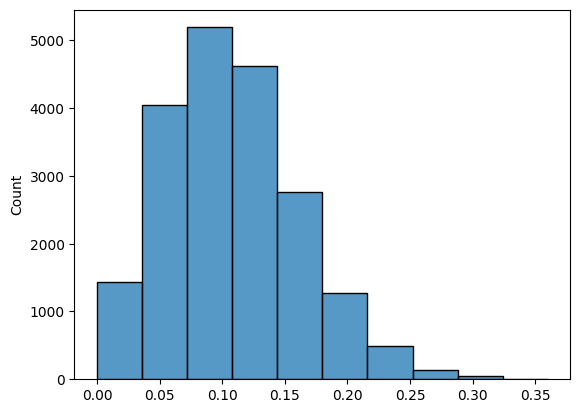

In [7]:
p = 0.10 # true population proportion
N = 250000000 # population size
n = 25 # sample size
numsamples = 20000 # number of samples in the simulation
numYes = p*N
numNo = (1-p)*N
print('numYes, numNo = {:.1f}, {:.1f}'.format(numYes, numNo))

possible_entries = np.concatenate((np.repeat(1,numYes), np.repeat(0,numNo)))
pv = np.repeat(0.0,numsamples) # sample proportions

for j in range(numsamples):
    # resample below produces a SIMPLE RANDOM SAMPLE!!!
    onesample = resample(possible_entries, n_samples=n, replace=True)
    pv[j] = np.sum( onesample == 1) / n

sns.histplot(pv,bins=10); # create histogram of sample proportions

pvbar = np.mean(pv) # mean of sample proportions
pvsd1 = np.std(pv,ddof=1) # standard deviation of sample proportions
print('pvbar, pvsd1 = {:.4f}, {:.4f}'.format(pvbar, pvsd1))


The simulations above confirm the Central Limit Theorem:

**Central Limit Theorem for Proportions:**

Provided that the observations are independent, and the sample size is sufficiently large to satisfy the **success/failure** conditions:
$np \ge 10$ and $n(1 - p) \ge 10$,
the sample proportion $\hat{p}$ follows a normal distribution with mean $\mu_{\hat{p}} = p$ and standard deviation (**standard error**)
$SE_{\hat{p}} = \sqrt{\dfrac{p(1-p)}{n}}$

First, let's verify the conditions of this CLT Theorem for the above examples:
1. $n = 1600, p = 0.41 \implies np = 656 \ge 10, ; n(1-p) = 944 \ge 10$
2. $n = 400, p = 0.41 \implies np = 164 \ge 10, ; n(1-p) = 236 \ge 10$
3. $n = 25, p = 0.10 \implies np = 2.5 < 10, ; n(1-p) = 22.5 \ge 10$

Thus, for the first two simulations, the CLT conditions hold, and the normal distribution is a valid approximation, but in the third case it fails and is skewed right.
Independence of individual observations must hold and is ensured, for example, for a simple random sample of less than 10% of the population size. In an unlikely case when the sample size $n$ exceeds 10% of the population size $N$, the standard error must be multiplied by a **finite correction factor** $\sqrt{\dfrac{N-n}{N-1}}$, which is very close to 1 for $n < 0.1N$.

Let's compare the results of the first simulation with $n = 1600$ to the predictions of the CLT. In the simulation $p = 0.41$; therefore, the corresponding normal distribution mean and standard error are:

$$\mu = p = 0.41$$
$$SE = \sqrt{\dfrac{p(1-p)}{n}} = \sqrt{\dfrac{0.41(1-0.41)}{1600}} \approx 0.0123$$

The theoretical standard error is very close to the simulation standard error $0.0122$.

In reality, the true population proportion $p$ is not known. Assume one poll of $n = 1600$ is taken and $x = 675$ participants approve the presidential performance, so the sample proportion $\hat{p} = 675/1600 \approx 0.422$. We cannot check the success/failure condition with unknown true population proportion $p$, so instead the sample proportion $\hat{p}$ is **substituted**:

$np \approx n\hat{p} = 1600 \cdot 0.422 = 675.2 \ge 10$

$n(1-p) \approx n(1-\hat{p}) = 1600 \cdot (1 - 0.422) = 924.8 \ge 10$

Therefore, the sample proportion approximately follows a normal distribution with mean and standard error:

$$\mu = 0.422$$
$$SE = \sqrt{\dfrac{p(1-p)}{n}} \approx \sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}} = \sqrt{\dfrac{0.422(1-0.422)}{1600}} = 0.01235$$

The standard error is extremely close to the one computed with the exact $p = 0.41$.

## Confidence Interval for Proportions

From the previous section, we know that sample proportions have a normal distribution centered at the true population proportion. Sample proportions naturally vary from sample to sample, so a range of plausible values (**confidence interval**) provides a better description of the true population proportion than a single sample estimate. It is like using a net to catch a fish instead of trying to hit it with a spear.

Provided the conditions of the CLT Theorem are satisfied, $\hat{p}$ follows a normal distribution with mean and standard deviation (called standard error) given by:

$\mu = \hat{p}$ and $SE = \sqrt{\dfrac{\hat{p}(1-\hat{p})}{n}}$

Note that the unknown true population proportion $p$ was substituted by its sample proportion approximation $\hat{p}$.

As we know, for a normal distribution, 95% of the data are within about 1.96 standard deviations away from the mean, as shown in the Figure below.

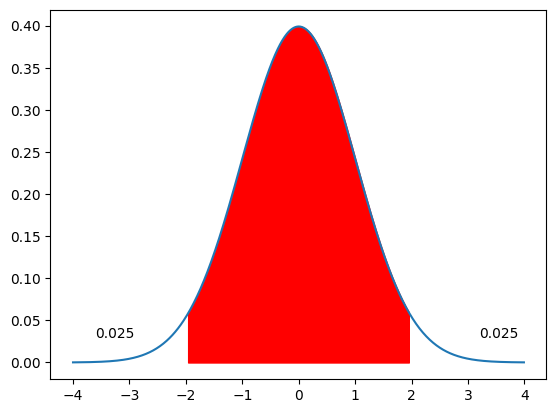

In [11]:
xv = np.arange(-4, 4, 0.01)
plt.plot(xv, norm.pdf(xv, 0, 1));

px = np.arange(-1.96,1.96,0.01)
plt.fill_between(px,norm.pdf(px,0,1),color='r');
plt.text(-3.6,0.03,"0.025"); plt.text(3.2,0.03,"0.025");

Therefore, the interval:

$$ \text{point estimate} \pm 1.96 \cdot SE = \hat{p} \pm 1.96 \sqrt{\dfrac{\hat{p}(1 - \hat{p})}{n}} $$

contains the true population proportion $p$ with 95% certainty — this is the **95% confidence interval (CI)**.

To better understand CIs, we perform a simulation of 100 such confidence intervals, as shown in the Figure below. Each one has a slightly different center $\hat{p}$ and slightly different length, but about 95% contain the true population proportion $p$. Therefore, if the procedure of selecting a simple random sample and computing a confidence interval is repeated, about 95% of the resulting CIs are expected to contain the true population proportion.

A few confidence intervals do not contain the true population proportion, but this does not invalidate the theory. It is a manifestation of natural sampling variability. Just as some observations naturally occur more than 1.96 standard deviations from the mean, analogously some point estimates naturally are further away from the true proportion. A confidence interval gives a plausible range of values. Values outside of it are implausible (much less likely), but not impossible.

Proportion inside =  0.97


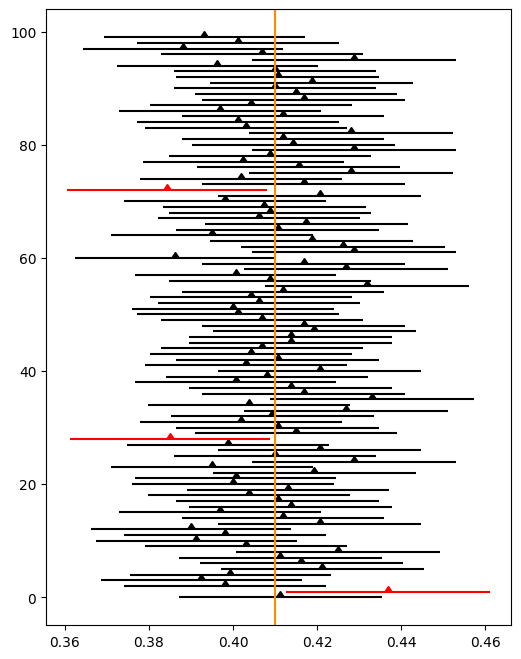

In [13]:
p0 = 0.41 # true population proportion
N = 250000000 # population size
n = 1600 # sample size
numsamples = 100 # number of samples in the simulation
numYes = p0*N
numNo = (1-p0)*N
numin = 0; # number of p's inside
# print('numYes, numNo = ', numYes, numNo)

possible_entries = np.concatenate((np.repeat(1,numYes), np.repeat(0,numNo)))
CIL = np.repeat(0.0,numsamples); CIR = np.repeat(0.0,numsamples)

_, ax = plt.subplots(1, 1, figsize=(6, 8));

for j in range(numsamples):
    # resample below produces a SIMPLE RANDOM SAMPLE!!!
    onesample = resample(possible_entries, n_samples=n, replace=True)
    phat = np.sum( onesample == 1) / n
    SE = np.sqrt(phat*(1-phat)/n)
    CIL[j] = phat - 1.96*SE
    CIR[j] = phat + 1.96*SE
    if (p0 > CIL[j] and p0 < CIR[j]):
        # interval contains p
        numin = numin + 1
        ax.errorbar(phat, j, lolims=True, xerr=1.96*SE, yerr=0.0, linestyle='', c='black')
    else:
        # interval does not contain p
        ax.errorbar(phat, j, lolims=True, xerr=1.96*SE, yerr=0.0, linestyle='', c='red')
        
ax.axvline(p0, color='darkorange')
print('Proportion inside = ', numin/numsamples)


**Example**

A sample of $n = 1600$ randomly chosen voters is taken and $x = 675$ of them approve presidential performance. Construct and interpret a 95% confidence interval for the population proportion.

In [14]:
alpha = 0.05 # error level corresponding to 95% confidence level
x = 675 # number of Yes
n = 1600 # sample size
phat = x/n # sample proportion
print('success/failure conditions n*phat, n*(1-phat) <=10?? ', n*phat, n*(1-phat))

SE = np.sqrt(phat*(1-phat)/n) # standard error
zstar = norm.ppf(1-alpha/2) # z critical
MarginErr = zstar*SE;# margin of error

CIL = phat - MarginErr
CIR = phat + MarginErr

df = pd.DataFrame({'phat':phat,'SE':SE,'zstar':zstar, 'MarginErr':MarginErr,'CIL':CIL,'CIR':CIR},index=[0]);
pd.set_option("display.precision", 4); print(df,'\n')

success/failure conditions n*phat, n*(1-phat) <=10??  675.0 925.0
     phat      SE  zstar  MarginErr     CIL     CIR
0  0.4219  0.0123   1.96     0.0242  0.3977  0.4461 



The interpretation is that we are 95% confident that the actual proportion of American voters who approve of the presidential performance is between $CIL = 0.400$ and $CIR = 0.446$.

### General Confidence Intervals

The most common level of confidence is 95%, but any level of confidence $1-\alpha$ equivalent to $\alpha$ level of error can be used. The figures below show confidence level areas for 90%, 95%, and 99% on the standard normal curve.

,ConfLevel,alpha,zstar
0,0.90,0.10,1.6449
1,0.95,0.05,1.9600
2,0.99,0.01,2.5758


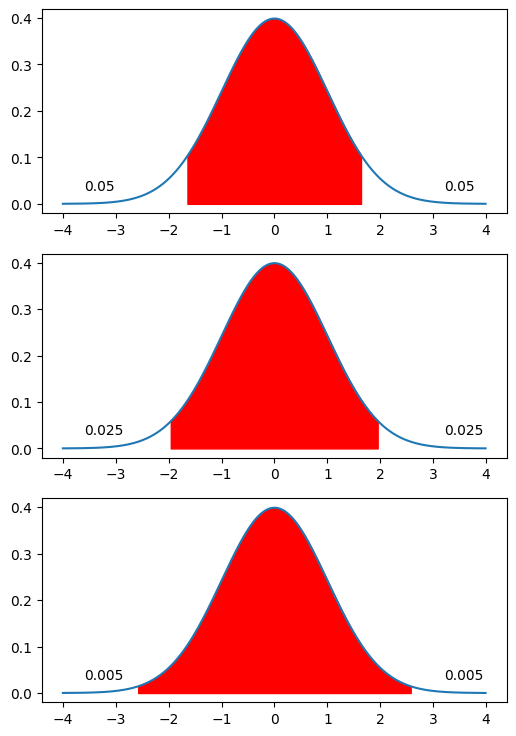

In [15]:
fig, axs = plt.subplots(3, 1, figsize=(6, 9), sharey=True);

xv = np.arange(-4, 4, 0.01)
ConfLevel = np.array([0.9,0.95,0.99])
alpha = 1-ConfLevel
zstar = norm.ppf(1-alpha/2)
df = pd.DataFrame({'ConfLevel':ConfLevel,'alpha':alpha,'zstar':zstar})

axs[0].plot(xv, norm.pdf(xv, 0, 1));

px = np.arange(-zstar[0],zstar[0],0.01)
axs[0].fill_between(px,norm.pdf(px,0,1),color='r');
axs[0].text(-3.6,0.03,"0.05"); axs[0].text(3.2,0.03,"0.05");

axs[1].plot(xv, norm.pdf(xv, 0, 1))

px = np.arange(-zstar[1],zstar[1],0.01)
axs[1].fill_between(px,norm.pdf(px,0,1),color='r');
axs[1].text(-3.6,0.03,"0.025"); axs[1].text(3.2,0.03,"0.025");

axs[2].plot(xv, norm.pdf(xv, 0, 1))

px = np.arange(-zstar[2],zstar[2],0.01)
axs[2].fill_between(px,norm.pdf(px,0,1),color='r');
axs[2].text(-3.6,0.03,"0.005"); axs[2].text(3.2,0.03,"0.005");

df

The critical $z^*$ is found in such a way that the area between $-z^*$ and $z^*$ under the standard normal distribution $N(0, 1)$ corresponds to the confidence level. These $z^*$ bounds for standard levels are given in the Python code above.

A **general confidence interval** for any critical $z^*$ is:

$$ \text{point estimate} \pm z^* \cdot SE = \hat{p} \pm z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

As the level of confidence increases, the area of the confidence region in the middle increases, so the corresponding **critical $z^*$ bound** increases and the interval becomes wider. Thus, we are more confident but about a wider interval. To use a fishing analogy: to be more sure to trap the fish, a wider net must be used (**trade-off relationship**).

The best way to write a confidence interval is in terms of margin of error $e$:

$$ e = z^* \cdot SE = z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \Rightarrow CI = \hat{p} \pm e $$

**Example**

In the previous example, construct 90%, 95%, and 99% confidence intervals.

In [16]:
ConfLevel = np.array([0.9,0.95,0.99]) # confidence level
alpha = 1-ConfLevel # error level corresponding to confidence level
x = 675; # number of Yes
n = 1600; # sample size
phat = x/n # sample proportion

print('sample proportion phat = ', x ,'/',n,'=',phat)
print('success/failure conditions n*phat, n*(1-phat) <=10?? ', n*phat, n*(1-phat))

SE = np.sqrt(phat*(1-phat)/n); # standard error
print('Standard error = sqrt(phat*(1-phat)/n) = ',SE)

zstar = norm.ppf(1-alpha/2) # z critical
MarginErr = zstar*SE # margin of error
CIL = phat - MarginErr
CIR = phat + MarginErr

df = pd.DataFrame({'ConfLevel':ConfLevel,'alpha':alpha,'zstar':zstar,'SE':SE, 
                   'e':MarginErr,'phat':phat,'CIL':CIL,'CIR':CIR})
pd.set_option("display.precision", 4); df


sample proportion phat =  675 / 1600 = 0.421875
success/failure conditions n*phat, n*(1-phat) <=10??  675.0 925.0
Standard error = sqrt(phat*(1-phat)/n) =  0.012346469241624303


,ConfLevel,alpha,zstar,SE,e,phat,CIL,CIR
0,0.90,0.10,1.6449,0.0123,0.0203,0.4219,0.4016,0.4422
1,0.95,0.05,1.9600,0.0123,0.0242,0.4219,0.3977,0.4461
2,0.99,0.01,2.5758,0.0123,0.0318,0.4219,0.3901,0.4537


The table above shows column by column all the steps for each confidence level. The sample proportion $\hat{p} = \frac{x}{n} = \frac{675}{1600} \approx 0.422$ and standard error $SE = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} \approx \sqrt{\frac{0.422(1-0.422)}{1600}} \approx 0.0123$ are the same regardless of the level. The margin of error is the product $e = z^* \cdot SE$, which increases with confidence level. The confidence interval is $\hat{p} \pm e$, which gets wider as the level of confidence increases.

There are common mistakes in the interpretation of the confidence intervals. First, the confidence intervals above apply to the *population proportion for the entire population of American voters*. Confidence intervals predict **nothing** about the sample proportion from another sample! For example, if another random sample of 1600 voters is collected, it would be *wrong* to say that there is a 99% chance that the interval (39.01%, 45.37%) obtained in the previous example contains a new sample proportion. Also, it is better to avoid incorrect language implying that the true population proportion has, say, a 99% chance of *falling inside* the above confidence interval. The true population proportion is a fixed number — it does not vary. Instead, the confidence interval is variable and has a chance to contain (catch) the true population proportion.

### More Examples of Proportion Confidence Intervals

**Example**

A company claims that only about 8% of its widgets can be defective. A sample of $n = 100$ randomly chosen widgets is taken and $x = 10$ of them turn out to be defective. Construct 90%, 95%, and 99% confidence intervals and interpret the results.

It is much more efficient to write a Python generic function to compute all confidence intervals in one shot.

In [ ]:
def OneProportionCI(x,n,ConfidenceLevels):
    print('One Proportion Confidence Interval function')
    print('Number of successes x = ', x)
    print('Sample size n = ', n)
    print('Confidence Levels',ConfidenceLevels)

    phat = x/n; phat # sample proportion
    print('sample proportion phat = {:.2f}/{:d} = {:.4f}'.format(x,n,phat))

    ConfLevel = np.array(ConfidenceLevels) # confidence level
    alpha = 1-ConfLevel # error level corresponding to confidence level
    print('success/failure: n*phat = {:.3f}, n*(1-phat) = {:.3f} <=10?? '.format(n*phat, n*(1-phat)))

    SEci = np.sqrt(phat*(1-phat)/n); # standard error for CI
    print('Standard Error = SEci =sqrt(phat*(1-phat)/n) =')
    print(' sqrt({:.4f}*(1-{:.4f})/{:d}) = {:.4f}'.format(phat,phat,n,SEci))

    zstar = norm.ppf(1-alpha/2) # z critical
    MarginErr = zstar*SEci # margin of error
    CIL = phat - MarginErr
    CIR = phat + MarginErr
    
    df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'SEci':SEci, 'MarginErr':MarginErr,'phat':phat,'CIL':CIL,'CIR':CIR})
    pd.set_option("display.precision", 4)
    
    print(df,'\n')
    

OneProportionCI(x=10,n=100,ConfidenceLevels=[0.9,0.95,0.99])

One Proportion Confidence Interval function
Number of successes x =  10
Sample size n =  100
Confidence Levels [0.9, 0.95, 0.99]
sample proportion phat = 10.00/100 = 0.1000
success/failure: n*phat = 10.000, n*(1-phat) = 90.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.1000*(1-0.1000)/100) = 0.0300
   ConfLevel   zstar  SEci  MarginErr  phat     CIL     CIR
0       0.90  1.6449  0.03     0.0493   0.1  0.0507  0.1493
1       0.95  1.9600  0.03     0.0588   0.1  0.0412  0.1588
2       0.99  2.5758  0.03     0.0773   0.1  0.0227  0.1773 



The most common 95% confidence interval contains the claimed 8% proportion of defective items, so there is *no reason to reject the company's claim*. In fact, in this case, all common levels of confidence produce intervals containing the claimed 8%.

**Example**

To assess the efficacy of a new drug, a random sample of $n = 159$ patients was taken and the drug was effective in 86% of them. The company claimed that it is at least 80% effective. Construct 90%, 95%, and 99% confidence intervals and interpret the results.

In this case, the actual number of people in which the drug was effective was not given, rather a percentage — 86%. Therefore, it is computed on the fly with $x = 0.86 \cdot 159$.

$$\hat{p} = \frac{x}{n} \Rightarrow x = \hat{p} \cdot n$$

In [4]:
OneProportionCI(x=0.86*159,n=159,ConfidenceLevels=[0.9,0.95,0.99])

One Proportion Confidence Interval function
Number of successes x =  136.74
Sample size n =  159
Confidence Levels [0.9, 0.95, 0.99]
sample proportion phat = 136.74/159 = 0.8600
success/failure: n*phat = 136.740, n*(1-phat) = 22.260 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.8600*(1-0.8600)/159) = 0.0275
   ConfLevel   zstar    SEci  MarginErr  phat     CIL     CIR
0       0.90  1.6449  0.0275     0.0453  0.86  0.8147  0.9053
1       0.95  1.9600  0.0275     0.0539  0.86  0.8061  0.9139
2       0.99  2.5758  0.0275     0.0709  0.86  0.7891  0.9309 



The 90% and 95% confidence intervals are completely above 80%, confirming the company's claim, but the 99% confidence interval is not. Thus, the choice of the confidence level makes a difference. There is no *right or wrong choice* of the confidence level; it is a subjective decision guided by cost-benefit analysis. If there is already an established drug on the market, a higher 99% confidence level may be needed. On the other hand, if there is no drug at all, perhaps a 90% confidence level should be used to give this drug more of a chance.

**Example**

A poll of US adults found that 26% of 310 Republicans supported a generic "National Health Plan." A politician claims that more than 1/3 of Republicans supported such a plan. Construct standard confidence intervals and interpret the results.

In [5]:
OneProportionCI(x=310*0.26,n=310,ConfidenceLevels=[0.9,0.95,0.99])

One Proportion Confidence Interval function
Number of successes x =  80.60000000000001
Sample size n =  310
Confidence Levels [0.9, 0.95, 0.99]
sample proportion phat = 80.60/310 = 0.2600
success/failure: n*phat = 80.600, n*(1-phat) = 229.400 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.2600*(1-0.2600)/310) = 0.0249
   ConfLevel   zstar    SEci  MarginErr  phat     CIL     CIR
0       0.90  1.6449  0.0249     0.0410  0.26  0.2190  0.3010
1       0.95  1.9600  0.0249     0.0488  0.26  0.2112  0.3088
2       0.99  2.5758  0.0249     0.0642  0.26  0.1958  0.3242 



The most common 95% confidence interval is well below $1/3 \approx 0.3333 = 33.33%$; therefore, the claim could be rejected. In fact, in this case, all common levels of confidence produce confidence intervals below the claimed 1/3.

## Hypothesis Testing for Proportions

In many situations, a claim is made about a population that requires a direct answer with a pre-defined certainty, which requires a **hypothesis testing framework**. We will introduce it with an example.

**Example**

A politician claims that the population is indifferent to imposing 2-term limits for governors (50% supporting, 50% not). A poll of $n = 1200$ likely voters is conducted, and $x = 550$ of them supported it. Investigate this hypothesis claim at the *error (significance level)* of 5%.

The first step is to state **null and alternative hypotheses**. The **null hypothesis** is generally the skeptical perspective ("no difference"), agreeing with the status quo. The **alternative hypothesis** rejects this status quo. In this problem, it would be *not 50/50*, i.e., there is preference one way or another — majority supports or majority opposes (*two-sided alternative*).

**$H_0$** $: p = 0.5$ (there are 50% supporting term limits)

**$H_1$** : p \neq 0.5$ (there is less than 50% or more than 50% supporting term limits)

The hypothesis test determines whether the sample proportion $\hat{p} = \frac{550}{1200} = 0.4583$ is significantly different from the claimed null hypothesis proportion $p_0 = 0.5$.

In hypothesis testing, it is always **initially assumed that the null hypothesis $H_0$ is true**. Then, the probability of observing the actual data or something even more extreme is found (**p-value**). Thus, assuming $H_0: p = 0.5$ is true sets **null proportion** $p_0 = 0.5$ that is used in all computations.

First, check the conditions of applicability of the Central Limit Theorem:
 1. The poll was based on a simple random sample, so *independence* holds.
 2. $n \cdot p_0 = 1200 \cdot 0.5 = 600 \ge 10$ and $n \cdot (1 - p_0) = 1200 \cdot 0.5 = 600 \ge 10 \Rightarrow$ success/failure conditions hold.

Therefore, the distribution of sample proportions $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by:

$\mu = p_0 = 0.5$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}} = \sqrt{\frac{0.5(1-0.5)}{1200}} = 0.014$.

For the confidence interval approach of the previous section, $p = \hat{p}$ was used in the success/failure conditions and the standard error (SE) computation. Now, $H_0$ is assumed true, so $p = p_0$ is used.

The **p-value** is the probability to observe the sampling proportion $\hat{p} = x/n = 0.4583$ or something even more extreme under our bell-shaped null distribution centered at $p_0 = 0.5$ with standard error $SE = 0.014$.

The alternative $H_1 : p \neq 0.5$ is two-sided; therefore both left and right tails must be accounted for. The normal distribution is symmetric, so the p-value can be found as twice the area of a single tail.

To find this tail area, we first find $z$ corresponding to the observed $\hat{p} = 0.458$:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.458 - 0.5}{0.014} = -2.887$$

Then, Python is used to find the area under the tail and multiply it by 2 to obtain $p\text{-value} = 0.0038924$. It measures how likely it is to observe sample proportion $\hat{p} = 0.458$ or something more extreme and is much less than the given significance (error) level $\alpha = 0.05$, so the initial assumption $H_0: p = 0.5$ can be rejected. Thus, the proportion of voters supporting 2-term limits for governors $\hat{p} = 0.458$ is significantly different from $0.5 = 50%$. Note that even though $\hat{p} = 0.458 < 0.5$, it is incorrect to change the alternative hypothesis $H_1: p \neq 0.5$ to one-sided $H_1: p < 0.5$ post-factum. It would have negative accuracy implications as will be explained later.

Using the confidence interval approach in the code below, we are 95% confident (for 5% significance error rate) that the true population proportion is between 43.01% and 48.65%, which does *not* contain the claimed $H_0: p = 0.5$. This confirms our conclusion to reject $H_0$.

Note that the confidence interval standard error computed with $\hat{p}$: $SE_{ci} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$ is not the same as the standard error for the hypothesis test computed with $p_0$: $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$. Therefore, in rare **borderline cases**, the conclusions on accepting or rejecting $H_0$ may be the opposite. In Chapter 7 on hypothesis tests for means, the standard error for the confidence interval will be the same as for the hypothesis test, so the conclusions will always match.

The Python code below summarizes these steps into one function.

In [6]:
def OneProportionTest(x,n,p0,ConfidenceLevels):
    print('One Proportion Test function')
    print('Number of successes x = ', x)
    print('Sample size n = ', n)
    print('Null hypothesis claimed proportion p0 = ', p0)
    print('Confidence Levels',ConfidenceLevels,'\n')
    print('H0: p = p0')
    print('H1: p not p0 or one-sided test\n')

    phat = x/n; phat # sample proportion
    print('sample proportion phat = {:.2f}/{:d} = {:.4f}'.format(x,n,phat))
    print('Hypothesis Testing Approach:')
    print('success/failure: n*p0 = {:.4f}, n*(1-p0) = {:.4f} <=10?? '.format(n*p0, n*(1-p0)))

    SE = np.sqrt(p0*(1-p0)/n); # standard error
    print('Standard Error = SE =sqrt(p0*(1-p0)/n) =')
    print(' sqrt({:.4f}*(1-{:.4f})/{:d}) = {:.4f}'.format(p0,p0,n,SE))

    z = (phat-p0)/SE; # standardized statistic
    print('Standardized z = (phat-p0)/SE = ({:.4f}-{:.4f})/{:.4f}={:.4f}'.format(phat,p0,SE,z))

    pval2 = 2*(1-norm.cdf(np.abs(z))); # 2 sided p-value
    print('P-values: 2-sided = {:.10f}, 1-sided ={:.10f}\n'.format(pval2,pval2/2))

    # P-value graphical illustration FYI-----------------------------
    fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=False)

    xv = np.arange(p0-4*SE, p0+4*SE, 0.001); diff = np.abs(p0-phat)
    axs[0].plot(xv, norm.pdf(xv, p0, SE))

    xL=np.arange(p0-4*SE,p0-diff,0.001)
    axs[0].fill_between(xL,norm.pdf(xL,p0,SE),color='r')

    xR=np.arange(p0+diff,p0+4*SE,0.001)
    axs[0].fill_between(xR,norm.pdf(xR,p0,SE),color='b')

    xv = np.arange(-4, 4, 0.001)
    axs[1].plot(xv, norm.pdf(xv, 0, 1))

    xL=np.arange(-4,-np.abs(z),0.001)
    axs[1].fill_between(xL,norm.pdf(xL,0,1),color='r')
    
    xR=np.arange(np.abs(z),4,0.001)
    axs[1].fill_between(xR,norm.pdf(xR,0,1),color='b')
    #------------------------------------------------------------------

    ConfLevel = np.array(ConfidenceLevels) # confidence level
    alpha = 1-ConfLevel # error level corresponding to confidence level
    print('Confidence Interval Approach: \n')
    print('success/failure: n*phat = {:.3f}, n*(1-phat) = {:.3f} <=10?? '.format(n*phat, n*(1-phat)))

    SEci = np.sqrt(phat*(1-phat)/n); # standard error for CI
    print('Standard Error = SEci =sqrt(phat*(1-phat)/n) =')
    print(' sqrt({:.4f}*(1-{:.4f})/{:d} = {:.4f} )'.format(phat,phat,n,SEci))

    zstar = norm.ppf(1-alpha/2) # z critical
    MarginErr = zstar*SEci # margin of error
    CIL = phat - MarginErr 
    CIR = phat + MarginErr

    df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'SEci':SEci, 'MarginErr':MarginErr,'phat':phat,'CIL':CIL,'CIR':CIR})
    pd.set_option("display.precision", 4)
    
    print(df,'\n')


One Proportion Test function
Number of successes x =  550
Sample size n =  1200
Null hypothesis claimed proportion p0 =  0.5
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 550.00/1200 = 0.4583
Hypothesis Testing Approach:
success/failure: n*p0 = 600.0000, n*(1-p0) = 600.0000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.5000*(1-0.5000)/1200) = 0.0144
Standardized z = (phat-p0)/SE = (0.4583-0.5000)/0.0144=-2.8868
P-values: 2-sided = 0.0038924171, 1-sided =0.0019462086

Confidence Interval Approach: 

success/failure: n*phat = 550.000, n*(1-phat) = 650.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.4583*(1-0.4583)/1200 = 0.0144 )
   ConfLevel   zstar    SEci  MarginErr    phat     CIL     CIR
0       0.90  1.6449  0.0144     0.0237  0.4583  0.4347  0.4820
1       0.95  1.9600  0.0144     0.0282  0.4583  0.4301  0.4865
2       0.99  2.5758  0.0144     0.0370  0.4583  0.4213  0.4954 



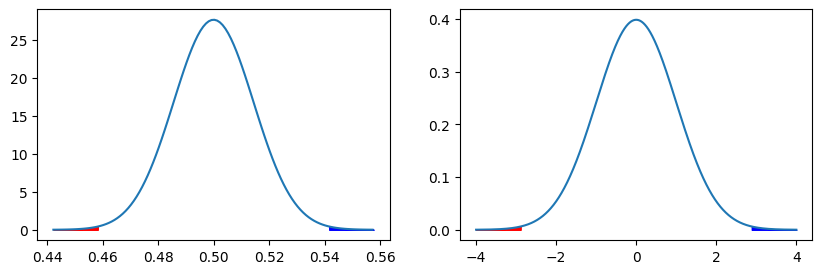

In [7]:
OneProportionTest(x=550,n=1200,p0=0.5,ConfidenceLevels=[0.9,0.95,0.99])

### More Proportion Hypothesis Tests Examples

**Example**

A company claims that only about 9% of its widgets are defective. A random sample of 120 widgets is taken and 14 of them turn out to be defective. Test the company's claim at a 5% level.

$\bm{H_0} : p = 0.09$ (company's claim — assume true)

$\bm{H_1} : p \neq 0.09$ (not what they claim)

One Proportion Test function
Number of successes x =  14
Sample size n =  120
Null hypothesis claimed proportion p0 =  0.09
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 14.00/120 = 0.1167
Hypothesis Testing Approach:
success/failure: n*p0 = 10.8000, n*(1-p0) = 109.2000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.0900*(1-0.0900)/120) = 0.0261
Standardized z = (phat-p0)/SE = (0.1167-0.0900)/0.0261=1.0207
P-values: 2-sided = 0.3073751089, 1-sided =0.1536875545

Confidence Interval Approach: 

success/failure: n*phat = 14.000, n*(1-phat) = 106.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.1167*(1-0.1167)/120 = 0.0293 )
   ConfLevel   zstar    SEci  MarginErr    phat     CIL     CIR
0       0.90  1.6449  0.0293     0.0482  0.1167  0.0685  0.1649
1       0.95  1.9600  0.0293     0.0574  0.1167  0.0592  0.1741
2       0.99  2.5758  0.0293     0.0755  0.1167  0.0412  0.1922 



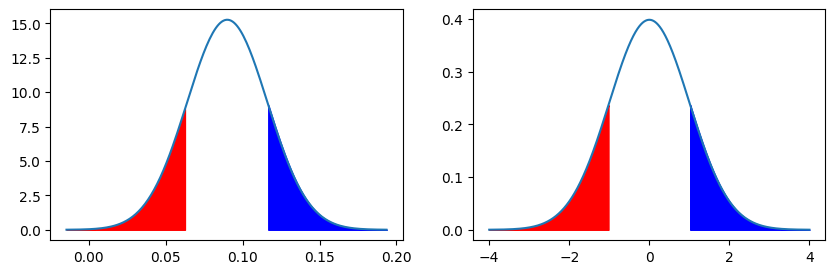

In [8]:
OneProportionTest(x=14,n=120,p0=0.09,ConfidenceLevels=[0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.117$ is significantly different from $H_0: p_0 = 0.09$. This null value $p_0$ is used to check the assumptions of the CLT. The sample of widgets is assumed to be a simple random sample, so the observations are *independent*. Also, $n \cdot p_0 \ge 10$ and $n \cdot (1 - p_0) \ge 10$, so success/failure conditions are satisfied. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$.

The **p-value** is the probability to see the observed sampling proportion $\hat{p}$ or something even more extreme under this bell-shaped normal null distribution. The $z$ corresponding to the observed $\hat{p}$ is:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.117 - 0.09}{0.026} = 1.021$$

The alternative $H_1 : p \neq p_0$ is two-sided, so both tails add up to $p\text{-value} = 0.3073751 > 0.05 = \alpha$. Therefore, there is *not* enough evidence to reject the initial assumption $H_0: p = p_0$ — no reason to reject the company's claim.

Also, from a confidence interval approach, we are 95% confident (for 5% significance error rate) that the true population proportion is between 5.92% and 17.41%, which contains the claimed $H_0: p = 0.09$. This confirms the conclusion not to reject $H_0$.

**Example**

About 7% of the population of some country is left-handed. The rest are right-handed, and about 1% are ambidextrous (no dominant hand). In a random sample of 300 children from a particular region, 32 are left-handed. Do these data provide evidence that the 7% value is inaccurate for children in this region? Use a stricter 1% level of significance.

$\bm{H_0} : p = 0.07$ (standard percentage — **assume true**)

$\bm{H_1} : p \neq 0.07$ (not standard percentage)

One Proportion Test function
Number of successes x =  32
Sample size n =  300
Null hypothesis claimed proportion p0 =  0.07
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 32.00/300 = 0.1067
Hypothesis Testing Approach:
success/failure: n*p0 = 21.0000, n*(1-p0) = 279.0000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.0700*(1-0.0700)/300) = 0.0147
Standardized z = (phat-p0)/SE = (0.1067-0.0700)/0.0147=2.4891
P-values: 2-sided = 0.0128068551, 1-sided =0.0064034276

Confidence Interval Approach: 

success/failure: n*phat = 32.000, n*(1-phat) = 268.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.1067*(1-0.1067)/300 = 0.0178 )
   ConfLevel   zstar    SEci  MarginErr    phat     CIL     CIR
0       0.90  1.6449  0.0178     0.0293  0.1067  0.0774  0.1360
1       0.95  1.9600  0.0178     0.0349  0.1067  0.0717  0.1416
2       0.99  2.5758  0.0178     0.0459  0.1067  0.0608  0.1526 



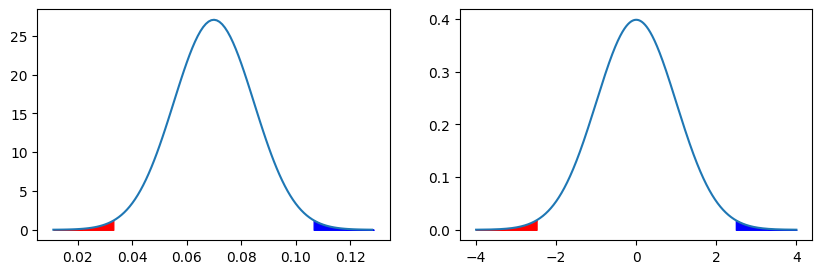

In [9]:
OneProportionTest(x=32,n=300,p0=0.07,ConfidenceLevels=[0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.107$ is significantly different from $H_0: p_0 = 0.07$. This null value $p_0$ is used to check the assumptions of the Central Limit Theorem (CLT). The sample of children is assumed to be a simple random sample, so the observations are independent. Also, $n \cdot p_0 \ge 10$ and $n \cdot (1 - p_0) \ge 10$, so success/failure conditions are satisfied. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$. (see the code and the Figure above)

The p-value is the probability to see the observed sampling proportion $\hat{p}$ or something even more extreme under this bell-shaped normal null distribution. The $z$ corresponding to the observed $\hat{p}$ is:

$z = \frac{\hat{p} - p_0}{SE} = \frac{0.107 - 0.07}{0.015} = 2.489$

The alternative $H_1 : p \neq p_0$ is two-sided, so both tails add up to $p\text{-value} = 0.0128069 > 0.01 = \alpha$. Therefore, there is *not* enough evidence to reject the initial assumption $H_0: p = p_0$ — no reason to reject the null claim. Note, however, that if we used the usual $\alpha = 0.05$ level, we would have rejected $H_0$.

Also, from a confidence interval approach, we are 99% confident (for 1% significance error rate) that the true population proportion is between 6.08% and 15.26%, which contains the claimed $H_0: p = 0.07$. This confirms our conclusion not to reject $H_0$. Note again that at 95% level, the CI is between 7.17% and 14.16% and does not contain $H_0: p = 0.07$, which would have resulted in the rejection of $H_0$.

So far, only two-sided hypothesis tests have been considered. It is often not known in advance which way the data lands, so it is a safer, more conservative approach (medical studies are usually two-sided). A one-sided hypothesis may o*verlook data supporting the opposite conclusion*, but one-sided tests are still quite common.

**Example**

A school district claims that **at least** 80% of its students passed the SAT. The State education board needs to check their claim. In a random sample of 200 students, 149 passed. Test at 5% error level.

The Python function written above does not require any changes for one-sided tests since it always prints both two-sided and one-sided p-values (one-sided p-value is just half of the two-sided). However, the interpretation changes. 

The "at least" in the problem formulation implies a **one-sided test** and the state board is trying to refute the school district's claim, so the alternative is to the left. Whether a one-sided test refutes or supports the claim is somewhat subtle, but an important decision.

$\bm{H_0} : p = 0.80$ (district claim — **assume true**)
$\bm{H_1} : p < 0.80$ (trying to refute their claim)

One Proportion Test function
Number of successes x =  149
Sample size n =  200
Null hypothesis claimed proportion p0 =  0.8
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 149.00/200 = 0.7450
Hypothesis Testing Approach:
success/failure: n*p0 = 160.0000, n*(1-p0) = 40.0000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.8000*(1-0.8000)/200) = 0.0283
Standardized z = (phat-p0)/SE = (0.7450-0.8000)/0.0283=-1.9445
P-values: 2-sided = 0.0518299272, 1-sided =0.0259149636

Confidence Interval Approach: 

success/failure: n*phat = 149.000, n*(1-phat) = 51.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.7450*(1-0.7450)/200 = 0.0308 )
   ConfLevel   zstar    SEci  MarginErr   phat     CIL     CIR
0       0.90  1.6449  0.0308     0.0507  0.745  0.6943  0.7957
1       0.95  1.9600  0.0308     0.0604  0.745  0.6846  0.8054
2       0.99  2.5758  0.0308     0.0794  0.745  0.6656  0.8244 



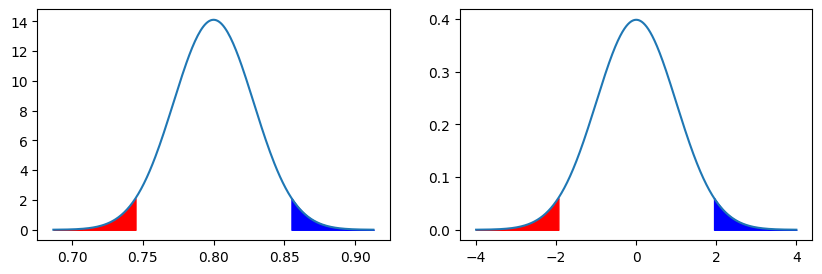

In [10]:
OneProportionTest(x=149,n=200,p0=0.80,ConfidenceLevels=[0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.745$ is significantly **less** than $H_0: p_0 = 0.80$. This null value $p_0$ is used to check the assumptions of the CLT. The sample of students is assumed to be a simple random sample, so the observations are *independent*. Also, $n \cdot p_0 \ge 10$ and $n \cdot (1 - p_0) \ge 10$, so success/failure conditions are satisfied. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$.

The **p-value** is the probability of seeing the observed sampling proportion $\hat{p}$ or something even more extreme (to the left) under this bell-shaped normal null distribution.

The $z$ corresponding to the observed $\hat{p}$ is:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.745 - 0.8}{0.028} = -1.944$$

The alternative $H_1: p < 0.80$ is one-sided, so only the left tail area gives $p\text{-value} = 0.025915 < 0.05 = \alpha$. Thus, the state officials can reject the district's claim. My code provides both two-tailed and one-tailed p-values. If a two-sided test were performed, then $p\text{-value} = 0.0518299 > 0.05$, so we would have failed to reject $H_0$.

Note that a one-sided test effectively doubles the chance of an error.

If $\hat{p} < p_0$, a one-sided alternative $H_1: p < p_0$ implies that any observation in the lower 5% tail of the null distribution rejects $H_0$.

If $\hat{p} > p_0$, a one-sided alternative $H_1: p > p_0$ implies that any observation in the upper 5% tail of the null distribution rejects $H_0$.

However, if $H_0$ is actually true, there is now a 10% chance of being in one of the two tails, not 5%.

The confidence interval method introduced before is always two-sided, therefore the confidence level has to be adjusted to $1-2\alpha = 0.90$, not $1-\alpha = 0.95$. Therefore, we are 90% confident (10% significance error) that the interval $(69.43%, 79.57%)$ contains the true population proportion. This interval does not contain the claimed $H_0: p = 0.80$, which confirms rejection of $H_0$. Note that the 95% confidence interval $(68.46%, 80.54%)$ contains the claimed $H_0: p = 0.8$, so the conclusion would have been opposite. This underlines the difficulty of a one-sided test presupposing left or right direction in addition to the aforementioned loss of accuracy.

Note that if, say, 165 students passed the test, then $\hat{p} = 165/200 = 0.825 > 0.80$. Thus, $\hat{p}$ is already opposite to the alternative $H_1 : p < 0.80$; therefore it is pointless to continue with the calculation — the data supports $H_0$. Only because the actual $\hat{p} = 149/200 = 0.745 < 0.80$, there was a point to continue.

Moreover, in case the sample proportion is below the claimed 80%, the question becomes whether it is significantly below. Assume, for example, that $\hat{p} = 155/200 = 0.775 < 0.80$, then the code and the figure give a very large $p$-value, for which we cannot reject $H_0$. Therefore, not only should $\hat{p}$ be below 0.80, it has to be sufficiently below to reject it.

One Proportion Test function
Number of successes x =  155
Sample size n =  200
Null hypothesis claimed proportion p0 =  0.8
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 155.00/200 = 0.7750
Hypothesis Testing Approach:
success/failure: n*p0 = 160.0000, n*(1-p0) = 40.0000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.8000*(1-0.8000)/200) = 0.0283
Standardized z = (phat-p0)/SE = (0.7750-0.8000)/0.0283=-0.8839
P-values: 2-sided = 0.3767591178, 1-sided =0.1883795589

Confidence Interval Approach: 

success/failure: n*phat = 155.000, n*(1-phat) = 45.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.7750*(1-0.7750)/200 = 0.0295 )
   ConfLevel   zstar    SEci  MarginErr   phat     CIL     CIR
0       0.90  1.6449  0.0295     0.0486  0.775  0.7264  0.8236
1       0.95  1.9600  0.0295     0.0579  0.775  0.7171  0.8329
2       0.99  2.5758  0.0295     0.0761  0.775  0.6989  0.8511 



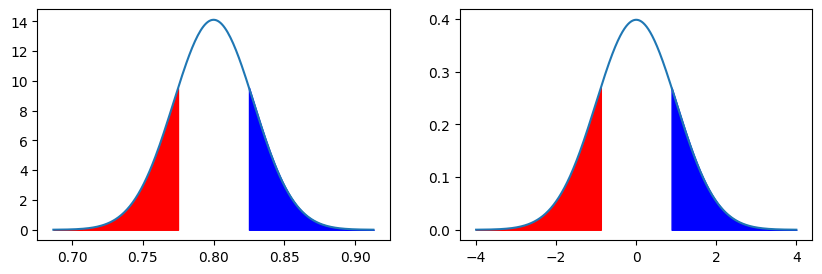

In [11]:
OneProportionTest(x=155,n=200,p0=0.80,ConfidenceLevels=[0.9,0.95,0.99])

The next example is also one-sided, illustrating substantiating rather than refuting the hypothesis.

**Example**

Assume a random sample of 1000 students from a top State University is taken, and 629 students are from this state. Can we conclude that **more than** 60% of students are in-state at a 5% level of significance?

$\bm{H_0} : p = 0.60$ (**assume true**)

$\bm{H_1} : p > 0.60$

The test is one-sided again. However, this time, we are not refuting $H_0$, but rather trying to substantiate it.

One Proportion Test function
Number of successes x =  629
Sample size n =  1000
Null hypothesis claimed proportion p0 =  0.6
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 629.00/1000 = 0.6290
Hypothesis Testing Approach:
success/failure: n*p0 = 600.0000, n*(1-p0) = 400.0000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.6000*(1-0.6000)/1000) = 0.0155
Standardized z = (phat-p0)/SE = (0.6290-0.6000)/0.0155=1.8719
P-values: 2-sided = 0.0612146350, 1-sided =0.0306073175

Confidence Interval Approach: 

success/failure: n*phat = 629.000, n*(1-phat) = 371.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.6290*(1-0.6290)/1000 = 0.0153 )
   ConfLevel   zstar    SEci  MarginErr   phat     CIL     CIR
0       0.90  1.6449  0.0153     0.0251  0.629  0.6039  0.6541
1       0.95  1.9600  0.0153     0.0299  0.629  0.5991  0.6589
2       0.99  2.5758  0.0153     0.0393  0.629  0.5897  0.6683 



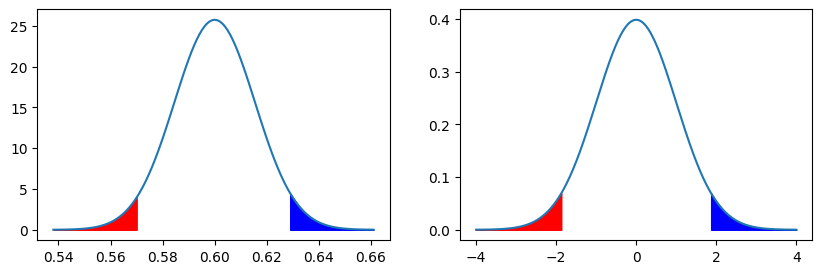

In [12]:
OneProportionTest(x=629,n=1000,p0=0.60,ConfidenceLevels=[0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.629$ is significantly **greater** than $H_0: p_0 = 0.60$. The assumptions of the CLT hold as before. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$.

The **p-value** is the probability to see the observed sampling proportion $\hat{p}$ or something even more extreme under the normal null distribution. The $z$ corresponding to the observed $\hat{p}$ is:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.629 - 0.60}{0.0155} = 1.879$$

The alternative $H_1: p > 0.60$ is one-sided, so only the right tail area gives $p\text{-value} = 0.030607 < 0.05 = \alpha$. Therefore, there is enough evidence to reject the initial assumption. Thus, there are more than 60% of in-state students (the one-sided alternative claim has been substantiated). Note that if the test was two-sided, the p-value would have been $0.06121 > 0.05$ and we would have failed to reject $H_0$.

As in the previous example with one-sided test, we have to use $1 - 2\alpha = 0.90$ confidence level, not $1 - \alpha = 0.95$. Therefore, we are 90% confident (for 10% significance error rate) that the true population proportion is between 60.39% and 65.41%, which does not contain the claimed $H_0: p = 0.60$. This confirms our conclusion to reject $H_0$. On the other hand, the 95% confidence interval between 59.91% and 65.89% contains the claimed $H_0: p = 0.60$, so it would have given an opposite conclusion from the hypothesis test result.

**Example**

In a large survey, one year people were asked if they thought unemployment would increase, and 46% thought that it would increase. Next year, a small opinion poll was conducted, and 282 out of 649 said that they thought unemployment would increase. At the 10% level, is there enough evidence to show that the proportion of citizens who believe unemployment would increase is **less than** the proportion who felt it would increase in the earlier survey?

$\bm{H_0} : p = 0.46$ (**assume true**)
$\bm{H_1} : p < 0.46$

One Proportion Test function
Number of successes x =  282
Sample size n =  649
Null hypothesis claimed proportion p0 =  0.46
Confidence Levels [0.8, 0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 282.00/649 = 0.4345
Hypothesis Testing Approach:
success/failure: n*p0 = 298.5400, n*(1-p0) = 350.4600 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.4600*(1-0.4600)/649) = 0.0196
Standardized z = (phat-p0)/SE = (0.4345-0.4600)/0.0196=-1.3027
P-values: 2-sided = 0.1926844267, 1-sided =0.0963422133

Confidence Interval Approach: 

success/failure: n*phat = 282.000, n*(1-phat) = 367.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.4345*(1-0.4345)/649 = 0.0195 )
   ConfLevel   zstar    SEci  MarginErr    phat     CIL     CIR
0       0.80  1.2816  0.0195     0.0249  0.4345  0.4096  0.4595
1       0.90  1.6449  0.0195     0.0320  0.4345  0.4025  0.4665
2       0.95  1.9600  0.0195     0.0381  0.4345  0.3964  0.4727
3       0.99  2.

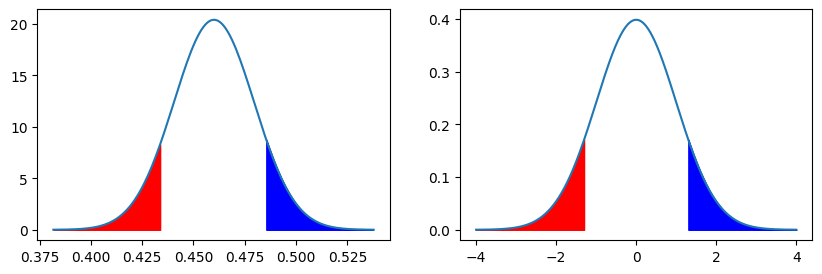

In [13]:
OneProportionTest(x=282,n=649,p0=0.46,ConfidenceLevels=[0.8,0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.435$ is significantly **less** than $H_0: p_0 = 0.46$. The assumptions of the CLT hold as before. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$.

The **p-value** is the probability to see the observed sampling proportion $\hat{p}$ or something even more extreme under the normal null distribution. The $z$ corresponding to the observed $\hat{p}$ is:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.435 - 0.46}{0.020} = -1.303$$

The alternative $H_1: p < 0.46$ is one-sided, so only the left tail area gives $p\text{-value} = 0.0963422 < 0.10 = \alpha$. Therefore, there is enough evidence to reject the initial assumption. Thus, there were significantly fewer people who thought that unemployment would increase. If we used the more common $\alpha = 0.05$, we would have failed to reject $H_0$. Note that my Python code provides both one-tailed and two-tailed p-values. In this case, if we had done a two-sided test, the p-value would have been $0.1926844 > 0.10$, and we would have failed to reject $H_0$ as well.

As in the previous example with a one-sided test, we have to use $1 - 2\alpha = 0.80$ confidence level, not $1 - \alpha = 0.90$. Therefore, we are only 80% confident (20% significance error) that the true population proportion is between 40.96% and 45.95%, which does not contain the claimed $H_0: p = 0.46$. This confirms our conclusion to reject $H_0$. On the other hand, the 90% confidence interval between 40.25% and 46.65% contains the claimed $H_0: p = 0.46$, so it would have given the opposite conclusion from the hypothesis test result.

### Decision Errors and Choosing a Significance (Error) Level


Data varies from sample to sample, so hypothesis tests are not perfect — errors can be made as the table below illustrates.
|             | Fail to Reject H0 | Reject H0    |
| ----------- | ----------------- | ------------ |
| H0 is true  | Correct           | Type 1 error |
| H0 is false | Type 2 error      | Correct      |


The rows show the actual truth, while the columns correspond to the decision made by the hypothesis test based on the data. Therefore, a Type 1 Error is rejecting the null hypothesis $H_0$ when it is actually true. Its probability is the significance level $\alpha$ in the tails of the confidence interval regions.

,ConfLevel,alpha,zstar
0,0.90,0.10,1.6449
1,0.95,0.05,1.9600
2,0.99,0.01,2.5758


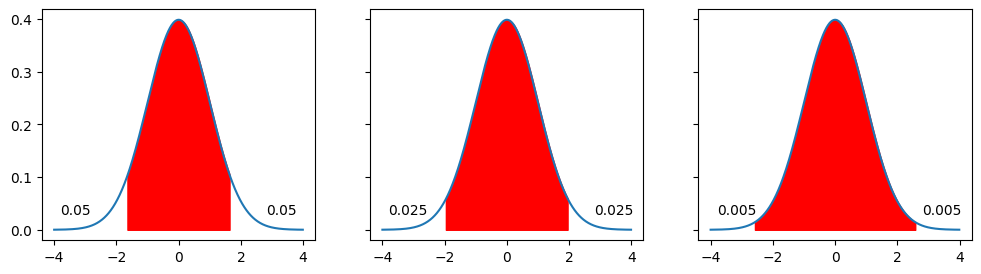

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

xv = np.arange(-4, 4, 0.01)
ConfLevel = np.array([0.9,0.95,0.99])
alpha = 1-ConfLevel
zstar = norm.ppf(1-alpha/2)

df = pd.DataFrame({'ConfLevel':ConfLevel,'alpha':alpha,'zstar':zstar})

axs[0].plot(xv, norm.pdf(xv, 0, 1))

px=np.arange(-zstar[0],zstar[0],0.01)
axs[0].fill_between(px,norm.pdf(px,0,1),color='r')
axs[0].text(-3.8,0.03,"0.05"); axs[0].text(2.8,0.03,"0.05")
axs[1].plot(xv, norm.pdf(xv, 0, 1))

px=np.arange(-zstar[1],zstar[1],0.01)
axs[1].fill_between(px,norm.pdf(px,0,1),color='r')
axs[1].text(-3.8,0.03,"0.025"); axs[1].text(2.8,0.03,"0.025")
axs[2].plot(xv, norm.pdf(xv, 0, 1))

px=np.arange(-zstar[2],zstar[2],0.01)
axs[2].fill_between(px,norm.pdf(px,0,1),color='r')
axs[2].text(-3.8,0.03,"0.005"); axs[2].text(2.8,0.03,"0.005")

df


A Type 2 Error is failing to reject the null hypothesis $H_0$ when it is actually false (i.e., the alternative $H_1$ is really true). Type 2 error probability cannot be computed directly, as it assumes that $H_1$ is true and requires knowledge of the alternative true proportion.

The Power of the test is the probability of the complement of the Type 2 error. It measures the probability of correctly rejecting $H_0$ when it is really false. In this section, we only introduce the idea; power computations are more naturally introduced for means tests in the subsequent chapter.

Note that if you are rejecting $H_0$, you might have committed a Type 1 error, and if you are failing to reject $H_0$, you might have committed a Type 2 error. It does not have to be the case, but it is a possibility. The Type 1 and Type 2 errors are in a trade-off relationship: if Type 1 error is reduced, it is harder to reject $H_0$ when it is actually true, but it is also harder to reject $H_0$ when it is actually false, increasing Type 2 error, and vice versa. If the sample size is increased, it would simultaneously reduce both types of errors, increasing overall accuracy.

In an analogy with the court system, a defendant is assumed innocent until proven guilty. Therefore:

$H_0$: defendant is innocent

$H_1$: defendant is guilty

Type 1 error: find the defendant guilty when they are actually innocent.

Type 2 error: find the defendant innocent when they are actually guilty.

The null hypothesis must only be rejected if there is strong enough evidence against it. The most common choice is to use $\alpha = 0.05$ (5% significance level, probability of Type 1 error), so that if $H_0$ is true, it is only rejected about 5% of the time.

In general, if Type 1 Error is more of a concern, stronger evidence for the alternative $H_1$ is required, and a smaller significance level (e.g., 0.01) should be chosen. For example, for a new drug being tested against an established one:

$H_0$: the new drug is no better than the standard (status quo)

$H_1$: the new drug is better or worse than the standard

It is only worth investing millions in large-scale production if the evidence in favor of the new drug is very strong.

If a Type 2 Error is more of a concern, then a higher significance level (e.g., 0.10) might be chosen. For example, if there is no drug available at all, more of a chance might be given to a new promising drug by increasing the significance level threshold to $\alpha = 0.10$. The choice of significance level $\alpha$ is ultimately a cost–benefit business decision.

*Statistical vs. Practical Significance*

As the sample size $n$ increases, the standard error $SE = \sqrt{\frac{p(1-p)}{n}}$ decreases, which reduces the margin of error $e = z^* \cdot SE$, leading to tighter confidence intervals. Also, $z = \frac{\hat{p}-p_0}{SE}$ increases, leading to smaller p-values. Therefore, differences between sample $\hat{p}$ and null $p_0$ in hypothesis testing are more likely to be statistically significant.

In the early days of statistics, samples were collected item-by-item and were rather small, so this was not an issue. Nowadays, samples are often automatically collected online, which can produce huge sample sizes. Then, even a minimal practically insignificant difference would be deemed statistically significant. For example, a change in advertisement strategy may increase TV show viewership by 0.01%, which is practically insignificant, but with millions in audience, it may be found statistically significant using hypothesis testing.

There are specialized methods dealing with very large sample sizes, especially in genetics. In addition, these considerations lead to the next section on how big the sample size has to be to minimally achieve the desired accuracy.

### Sample Size for Proportion

In this section, we investigate how large the sample size $n$ should be to ensure a given margin of error $e$ (accuracy). First, solve the formula for the margin of error for $n$:

$$e = z^* \cdot SE = z^* \cdot \sqrt{\frac{p(1-p)}{n}} \Rightarrow e^2 = (z^*)^2 \cdot \frac{p(1-p)}{n}$$

$$\Rightarrow n = (z^*)^2 \cdot \frac{p(1-p)}{e^2}$$

Note that we are trying to determine the sample size $n$ *before* the experiment, so $p$ or $\hat{p}$ are *not* known. If an estimate of $p$ is available from a previous study, use it. If not, $p(1-p) = p - p^2$ is a downward parabola maximized in the middle of $[0, 1]$ interval at $p = 0.5$. Then $p = 0.5$ is taken as a conservative worst-case estimate.

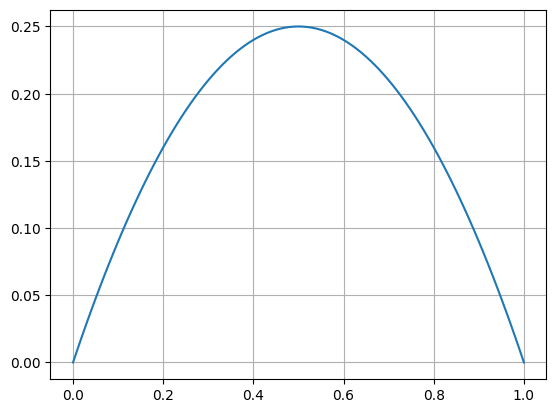

In [15]:
pv = np.arange(0,1.01,0.01)
fv = pv*(1-pv)

plt.plot(pv,fv);
plt.grid();

The sample size is directly proportional to $(z^*)^2$. Therefore, as the level of confidence increases (say 90% to 95%, to 99%), $z^*$ increases, and the sample size $n$ increases (see Figure below). In addition, $n$ is inversely proportional to $e^2$, so as the margin of error $e$ increases (lower accuracy), $n$ will decrease.

**Example**

How big of a sample is required for a pollster to measure a proportion of adults using the internet with a maximum error of 1% and 95% confidence?
 1. Assume a previous survey showed 70% of adults use the internet.
 2. Assume nothing is known about the proportion.

In [16]:
e = 0.01
alpha = 0.05
zstar = norm.ppf(1-alpha/2)
print('e = {:.3f}, alpha = {:.3f}, zstar = {:.3f}'.format(e,alpha,zstar))

# (a)
p = 0.70
na = zstar**2*p*(1-p)/e**2
print('For p = {:.3f} number needed for the study na = {:.3f}'.format(p,na))

# (b)
p = 0.50
nb = zstar**2*p*(1-p)/e**2
print('For p = {:.3f} number needed for the study nb = {:.3f}'.format(p,nb))

e = 0.010, alpha = 0.050, zstar = 1.960
For p = 0.700 number needed for the study na = 8067.064
For p = 0.500 number needed for the study nb = 9603.647


Both sample sizes are rather large. The reason is that the given margin of error of 1% is too small; increasing it to 2% results in a 4-fold reduction in sample sizes.

In [17]:
e = 0.02
alpha = 0.05
zstar = norm.ppf(1-alpha/2)
print('e = {:.3f}, alpha = {:.3f}, zstar = {:.3f}'.format(e,alpha,zstar))

# (a)
p = 0.70
na = zstar**2*p*(1-p)/e**2
print('For p = {:.3f} number needed for the study na = {:.3f}'.format(p,na))

# (b)
p = 0.50
nb = zstar**2*p*(1-p)/e**2
print('For p = {:.3f} number needed for the study nb = {:.3f}'.format(p,nb))

e = 0.020, alpha = 0.050, zstar = 1.960
For p = 0.700 number needed for the study na = 2016.766
For p = 0.500 number needed for the study nb = 2400.912


Let's illustrate the sample size needed for different confidence levels.

In [18]:
e = 0.02
ConfLevel = np.array([0.90,0.95,0.99]) # confidence levels
alpha = 1-ConfLevel; # corresponding error levels
zstar = norm.ppf(1-alpha/2)
print('e, alpha, zstar = ', e, alpha, zstar)

# (a)
p = 0.70
na = zstar**2*p*(1-p)/e**2
df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'na':na})
print('\nFor p = 0.7: \n',df)

# (b)
p = 0.50
nb = zstar**2*p*(1-p)/e**2
df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'nb':nb})
pd.set_option("display.precision", 4)
print(df,'\n')

e, alpha, zstar =  0.02 [0.1  0.05 0.01] [1.64485363 1.95996398 2.5758293 ]

For p = 0.7: 
    ConfLevel   zstar         na
0       0.90  1.6449  1420.4103
1       0.95  1.9600  2016.7659
2       0.99  2.5758  3483.3207
   ConfLevel   zstar         nb
0       0.90  1.6449  1690.9647
1       0.95  1.9600  2400.9118
2       0.99  2.5758  4146.8104 



As the confidence level increases, $z^*$ increases, and the required sample size increases.

### One-Proportion Tests for Data Files

In this section, a one-proportion test is applied to a data file, which requires first determining each level count as was done in Chapter 2.

**Example**

We investigate the file 'HELPrct.csv' used in Chapter 2. It contains information about 453 substance abusers. We focus on the proportion of homeless vs. housed in this sample and want to test if it is 50/50.

$\bm{H_0} : p = 0.5$ (**assume true**)
$\bm{H_1} : p \neq 0.5$

We use 'value_counts()' to count subgroups. The '.bar()' method is used to produce a bar plot.

housed      244
homeless    209
Name: homeless, dtype: int64


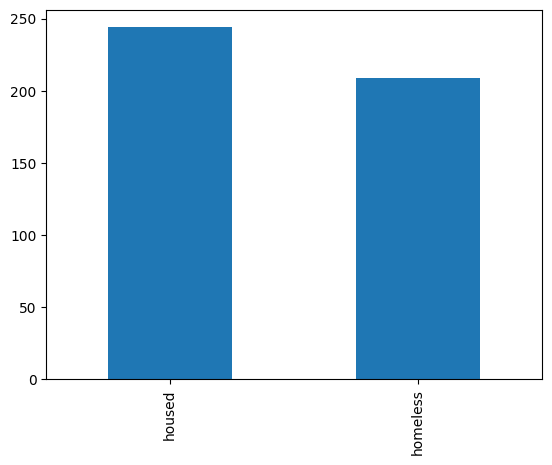

In [19]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) # save as mydata file

mytable = mydata['homeless'].value_counts() #
print(mytable)

mytable.plot.bar();


One Proportion Test function
Number of successes x =  209
Sample size n =  453
Null hypothesis claimed proportion p0 =  0.5
Confidence Levels [0.9, 0.95, 0.99] 

H0: p = p0
H1: p not p0 or one-sided test

sample proportion phat = 209.00/453 = 0.4614
Hypothesis Testing Approach:
success/failure: n*p0 = 226.5000, n*(1-p0) = 226.5000 <=10?? 
Standard Error = SE =sqrt(p0*(1-p0)/n) =
 sqrt(0.5000*(1-0.5000)/453) = 0.0235
Standardized z = (phat-p0)/SE = (0.4614-0.5000)/0.0235=-1.6444
P-values: 2-sided = 0.1000846363, 1-sided =0.0500423181

Confidence Interval Approach: 

success/failure: n*phat = 209.000, n*(1-phat) = 244.000 <=10?? 
Standard Error = SEci =sqrt(phat*(1-phat)/n) =
 sqrt(0.4614*(1-0.4614)/453 = 0.0234 )
   ConfLevel   zstar    SEci  MarginErr    phat     CIL     CIR
0       0.90  1.6449  0.0234     0.0385  0.4614  0.4228  0.4999
1       0.95  1.9600  0.0234     0.0459  0.4614  0.4155  0.5073
2       0.99  2.5758  0.0234     0.0603  0.4614  0.4010  0.5217 



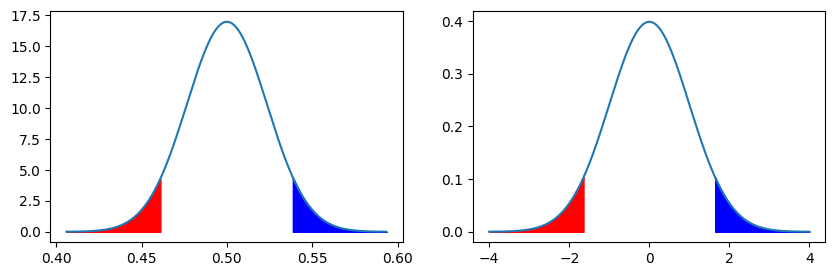

In [20]:
OneProportionTest(x=209,n=209+244,p0=0.50,ConfidenceLevels=[0.9,0.95,0.99])

The hypothesis test tries to infer whether the sample proportion $\hat{p} = 0.461$ is significantly different from $H_0: p_0 = 0.5$. This null value $p_0$ is used to check the assumptions of the CLT. The patients can be assumed independent from each other (based on selection, simple random sample, etc.). Also, $n \cdot p_0 \ge 10$ and $n \cdot (1-p_0) \ge 10$, so success/failure conditions are satisfied. Therefore, the sampling distribution of $\hat{p}$ (**null distribution**) is normal with mean and standard deviation given by $\mu = p_0$ and $SE = \sqrt{\frac{p_0(1-p_0)}{n}}$.

The **p-value** is the probability of seeing the observed sampling proportion $\hat{p}$ or something even more extreme under this bell-shaped normal null distribution. The $z$ corresponding to the observed $\hat{p}$ is:

$$z = \frac{\hat{p} - p_0}{SE} = \frac{0.461 - 0.5}{0.023} = -1.644$$

The alternative $H_1: p \neq p_0$ is two-sided, so both tails add up to p-value = 0.1000846 > 0.05 = $\alpha$. Therefore, there is *not* enough evidence to reject the initial assumption $H_0: p = p_0$. Thus, no reason to reject the 50/50 claim.

Using the confidence interval approach, we are 95% confident (for 5% significance error rate) that the true population proportion is between 41.55% and 50.73%, which contains the claimed $H_0: p = 0.50$. This confirms our conclusion not to reject $H_0$.

## Difference of Two Proportions

Earlier in this chapter, one-sample proportions were considered. A more common situation, however, is to compare two proportions to each other. For example, a smartphone manufacturer may need to compare the proportions of defective chips from two chip manufacturers. A government oversight organization may be interested in comparing the success proportions of heart transplants at two hospitals. The Center for Disease Control may need to compare COVID-19 infection rates in two universities, etc.

**Central Limit Theorem for Two Proportions**

Consider two simple random samples. Assume the following conditions:
 * The data are *independent within and between the two groups* (for example, two independent simple random samples).
 * *Success/failure conditions* hold for both groups:
$n_1p_1 \ge 10, n_1(1 - p_1) \ge 10, n_2p_2 \ge 10, n_2(1 - p_2) \ge 10$

Then the difference of sample proportions $\hat{p}_1 - \hat{p}_2$ follows a **normal distribution** with the mean and standard error given by:

$\mu = p_1 - p_2$ and $SE = \sqrt{\frac{p_1(1-p_1)}{n_1} + \frac{p_2(1-p_2)}{n_2}}$

respectively, where $p_1$ and $p_2$ represent population proportions, and $n_1$ and $n_2$ are sample sizes.

For the confidence interval approach, success/failure conditions and standard error computations directly use $\hat{p}_1$ and $\hat{p}_2$:
 1. Success/failure conditions: $n_1\hat{p}_1 \ge 10, n_1(1 - \hat{p}_1) \ge 10, n_2\hat{p}_2 \ge 10, n_2(1 - \hat{p}_2) \ge 10$
 2. $SE = \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2(1-\hat{p}_2)}{n_2}}$

Then the margin of error $e$ and confidence interval $CI$ are:

$$e = z^* \cdot SE = z^* \sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$CI = \hat{p}_1 - \hat{p}_2 \pm e$$

For the hypothesis testing approach for two proportions, $H_0: p_1 - p_2 = 0$ (equal population proportions); therefore, sample proportions are pooled as follows:

Let $\hat{p}_1 = \frac{x_1}{n_1}$ and $\hat{p}_2 = \frac{x_2}{n_2}$ be the two-sample proportions, then the **pooled proportion** is:

$p_{pool} = \frac{x_1 + x_2}{n_1 + n_2} = \frac{\hat{p}_1 n_1 + \hat{p}_2 n_2}{n_1 + n_2}$

It is used in success/failure conditions and standard error computations:
 1. Success/failure conditions: $n_1 p_{pool} \ge 10, n_1(1 - p_{pool}) \ge 10, n_2 p_{pool} \ge 10, n_2(1 - p_{pool}) \ge 10$
 2. $SE = \sqrt{\frac{p_{pool}(1 - p_{pool})}{n_1} + \frac{p_{pool}(1 - p_{pool})}{n_2}} = \sqrt{p_{pool}(1 - p_{pool})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}$

Then the test statistic is:

$$z = \frac{(\hat{p}_1 - \hat{p}_2) - (p_1 - p_2)}{SE} = \frac{(\hat{p}1 - \hat{p}2) - 0}{\sqrt{p{pool}(1 - p{pool})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}$$

Finally, the p-value is computed based on this standardized statistic $z$ in the same way as for one sample.

**Example**

The computer manufacturing company evaluates the quality of computer chips provided by companies A and B. In a random sample of manufacturer A, 23 out of 80 chips were defective, and for manufacturer B, 30 out of 64 were defective. Compare the proportions at the 5% level and make conclusions.

$\bm{H_0} : p_1 - p_2 = 0$ (no difference in proportions - **assume true**)

$\bm{H_1} : p_1 - p_2 \ne 0$ (there is a difference in proportions)

First, we create a 'TwoProportionTest' function to implement this method. The code is long, but it is all based on the above formulas plus a few technical details to print the steps and plot the figures.

In [21]:
def TwoProportionTest(x1,n1,x2,n2,CIs):
    print('Two Proportions Test function')
    print('Group 1: number of yes x1 = {:d}, out of n1 = {:d}'.format(x1,n1))
    print('Group 2: number of yes x2 = {:d}, out of n2 = {:d}'.format(x2,n2))
    print('Confidence Levels',CIs,'\n')
    print('H0: p1-p2 = 0');
    print('H1: p1-p2 not 0 or one-sided test\n')

    ph1 = x1/n1; # sample proportion for 1st group
    ph2 = x2/n2; # sample proportion for 2nd group
    print('sample proportions ph1 = {:d}/{:d} = {:.4f}'.format(x1,n1,ph1))
    print('sample proportions ph2 = {:d}/{:d} = {:.4f}'.format(x2,n2,ph2))

    print('Hypothesis Testing Approach:')

    pL = (x1+x2)/(n1+n2)
    print('p pooled = pL = ({:d}+{:d})/({:d}+{:d})={:.4f}'.format(x1,x2,n1,n2,pL))
    print("success-failure conditions n1*pL,n1*(1-pL),n2*pL, n2*(1-pL) >=10??")
    print(' {:.4f},{:.4f},{:.4f},{:.4f}'.format(n1*pL,n1*(1-pL),n2*pL,n2*(1-pL)))

    SE = np.sqrt(pL*(1-pL)*(1/n1+1/n2)); SE # standard error
    print('Standard Error = SE =sqrt(pL*(1-pL)*(1/n1+1/n2)) =')
    print(' = sqrt({:.4f}(1-{:.4f})(1/{:d}+1/{:d})) = {:.4f}'.format(pL,pL,n1,n2,SE))

    diffphats = ph1-ph2
    print('difference phat1-phat2 = {:.4f}-{:.4f} = {:.4f}'.format(ph1,ph2,diffphats))

    z = (diffphats)/SE; # standardized statistic
    print('Standardized statistic = z = diffphats/SE = {:.4f}/{:.4f} = {:.4f}'.format(diffphats,SE,z))

    pval2 = 2*(1-norm.cdf(np.abs(z))); # 2 sided p-value
    print('P-values: 2-sided = {:.10f}, 1-sided ={:.10f}\n'.format(pval2,pval2/2))

    # P-value graphical illustration FYI-----------------------------
    fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharey=False)

    xv = np.arange(-4*SE, 4*SE, 0.001); diff = np.abs(diffphats)
    axs[0].plot(xv, norm.pdf(xv, 0, SE))

    xL=np.arange(-4*SE,-diff,0.001)
    axs[0].fill_between(xL,norm.pdf(xL,0,SE),color='r')

    xR=np.arange(diff,4*SE,0.001)
    axs[0].fill_between(xR,norm.pdf(xR,0,SE),color='b')

    xv = np.arange(-4, 4, 0.001)
    axs[1].plot(xv, norm.pdf(xv, 0, 1))

    xL=np.arange(-4,-np.abs(z),0.001)
    axs[1].fill_between(xL,norm.pdf(xL,0,1),color='r')

    xR=np.arange(np.abs(z),4,0.001)
    axs[1].fill_between(xR,norm.pdf(xR,0,1),color='b')
    #------------------------------------------------------------------

    print('Confidence Interval Approach:')
    ConfLevel = np.array(CIs) # confidence level
    alpha = 1-ConfLevel # error level corresponding to confidence level
    print("success-failure conditions n1*ph1,n1*(1-ph1),n2*ph2, n2*(1-ph2) >=10??")
    print(' {:.4f},{:.4f},{:.4f},{:.4f}'.format(n1*ph1,n1*(1-ph1),n2*ph2,n2*(1-ph2)))
    
    SEci = np.sqrt(ph1*(1-ph1)/n1+ph2*(1-ph2)/n2);
    print('Standard Error = SEci =sqrt(ph1*(1-ph1)/n1+ph1*(1-ph2)/n2)) =')
    print(' = sqrt({:.4f}(1-{:.4f})/{:d}+{:.4f}(1-{:.4f})/{:d}) = {:.4f}'.format(ph1,ph1,n1,ph2,ph2,n2,SEci))

    zstar = norm.ppf(1-alpha/2); # z critical
    MarginErr = zstar*SEci; # margin of error
    CIL = diffphats - MarginErr
    CIR = diffphats + MarginErr

    df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'SEci':SEci, 'MarginErr':MarginErr,'diffphats':diffphats,'CIL':CIL,'CIR':CIR});
    pd.set_option("display.precision", 4); print(df,'\n')

Let's call on the function above to solve the given problem

Two Proportions Test function
Group 1: number of yes x1 = 23, out of n1 = 80
Group 2: number of yes x2 = 30, out of n2 = 64
Confidence Levels [0.9, 0.95, 0.99] 

H0: p1-p2 = 0
H1: p1-p2 not 0 or one-sided test

sample proportions ph1 = 23/80 = 0.2875
sample proportions ph2 = 30/64 = 0.4688
Hypothesis Testing Approach:
p pooled = pL = (23+30)/(80+64)=0.3681
success-failure conditions n1*pL,n1*(1-pL),n2*pL, n2*(1-pL) >=10??
 29.4444,50.5556,23.5556,40.4444
Standard Error = SE =sqrt(pL*(1-pL)*(1/n1+1/n2)) =
 = sqrt(0.3681(1-0.3681)(1/80+1/64)) = 0.0809
difference phat1-phat2 = 0.2875-0.4688 = -0.1813
Standardized statistic = z = diffphats/SE = -0.1813/0.0809 = -2.2410
P-values: 2-sided = 0.0250281627, 1-sided =0.0125140813

Confidence Interval Approach:
success-failure conditions n1*ph1,n1*(1-ph1),n2*ph2, n2*(1-ph2) >=10??
 23.0000,57.0000,30.0000,34.0000
Standard Error = SEci =sqrt(ph1*(1-ph1)/n1+ph1*(1-ph2)/n2)) =
 = sqrt(0.2875(1-0.2875)/80+0.4688(1-0.4688)/64) = 0.0803
   ConfLevel   

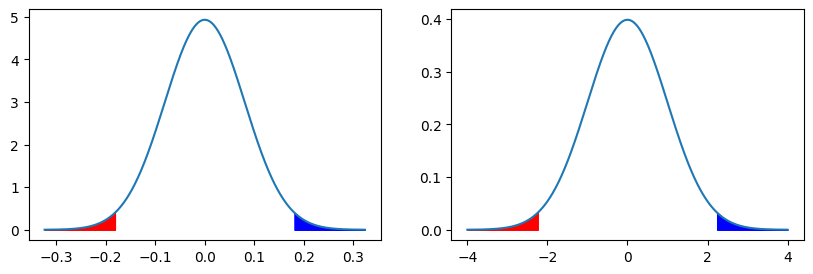

In [ ]:
TwoProportionTest(x1=23,n1=80,x2=30,n2=64,CIs=[0.90,0.95,0.99])

The hypothesis test aims to infer whether the sample proportions difference $\hat{p}_1 - \hat{p}_2 = 0.288 - 0.469 = -0.181$ is significantly different from the claimed null hypothesis difference of 0. The samples of chips are assumed to be simple random samples, so the observations are *independent* within groups and the samples are independent from each other. Also, the code above shows that:

$n_1 p_{pool} = 80 \cdot 0.368 = 29.444 \ge 10$, $n_1(1 - p_{pool}) = 80 \cdot (1 - 0.368) = 50.556 \ge 10$

$n_2 p_{pool} = 64 \cdot 0.368 = 23.556 \ge 10$, $n_2(1 - p_{pool}) = 64 \cdot (1 - 0.368) = 40.444 \ge 10$

so the success/failure conditions are satisfied.

Therefore, based on CLT, the sampling distribution of $\hat{p}_1 - \hat{p}_2$ (**null distribution**) is normal with mean and standard deviation given by:

$\mu = 0$ and $SE = \sqrt{p_{pool}(1 - p_{pool})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)} = \sqrt{0.368(1 - 0.368)\left(\frac{1}{80} + \frac{1}{64}\right)} = 0.081$ (see left plot of the Figure above).

The **p-value** is the probability to see the observed sampling proportion difference $\hat{p}_1 - \hat{p}_2 = -0.181$ or something even more extreme under the normal null distribution.

The $z$ corresponding to $\hat{p}_1 - \hat{p}_2 = -0.181$ is:

$$z = \frac{\hat{p}_1 - \hat{p}_2 - 0}{SE} = \frac{0.288 - 0.469}{0.081} = \frac{-0.181}{0.081} = -2.241$$

The alternative $H_1 : p_1 - p_2 \ne 0$ is two-sided, so both tails add up to $p$-value = 0.0250282 < 0.05 = $\alpha$, as shown in the Figure above (for the original proportions in the left Figure, and for the standardized z-scores in the right Figure). Thus, there is enough evidence to reject the initial assumption $H_0$, i.e., rejecting the claim of equal proportion of defective chips produced by these two companies.

For the confidence interval computations, the success/failure conditions and standard error are computed using $\hat{p}_1$ and $\hat{p}_2$:

$n_1 \hat{p}_1 = 80 \cdot 0.288 = 23 \ge 10$, $n_1(1 - \hat{p}_1) = 80 \cdot (1 - 0.288) = 57 \ge 10$

$n_2 \hat{p}_2 = 64 \cdot 0.469 = 30 \ge 10$, $n_2(1 - \hat{p}_2) = 64 \cdot (1 - 0.469) = 34 \ge 10$

⇒ success/failure conditions are satisfied.

Standard error:

$$SE = \sqrt{\frac{\hat{p}_1(1 - \hat{p}_1)}{n_1} + \frac{\hat{p}_2(1 - \hat{p}_2)}{n_2}}$$

$$= \sqrt{\frac{0.288(1 - 0.288)}{80} + \frac{0.469(1 - 0.469)}{64}} = 0.0803$$

Therefore, say 95% confidence interval for the difference of population proportions $p_1 - p_2$ is:

$$\hat{p}_1 - \hat{p}_2 \pm z^* \cdot SE = 0.288 - 0.469 \pm 1.96 \cdot 0.0803$$

$$= -0.181 \pm 0.157 = (-0.3387, -0.0238)$$

Therefore, we are 95% confident (5% significance error) that the true population proportion difference is between −33.87% and −2.38%, which does *not* contain $H_0 : p_1 - p_2 = 0$, once again confirming our conclusion to reject $H_0$.

**Example**

A total of 87 out of 100 students preparing with firm B's preparation guide passed the Medical admission test MCAT, while 91 out of 120 passed it with firm P's guide. Is there a significant difference at the 1% level? How about a 5% level?

$\bm{H_0} : p_1 - p_2 = 0$ (no difference in proportions - **assume true**)

$\bm{H_1} : p_1 - p_2 \ne 0$ (there is a difference in proportions)

Two Proportions Test function
Group 1: number of yes x1 = 87, out of n1 = 100
Group 2: number of yes x2 = 91, out of n2 = 120
Confidence Levels [0.9, 0.95, 0.99] 

H0: p1-p2 = 0
H1: p1-p2 not 0 or one-sided test

sample proportions ph1 = 87/100 = 0.8700
sample proportions ph2 = 91/120 = 0.7583
Hypothesis Testing Approach:
p pooled = pL = (87+91)/(100+120)=0.8091
success-failure conditions n1*pL,n1*(1-pL),n2*pL, n2*(1-pL) >=10??
 80.9091,19.0909,97.0909,22.9091
Standard Error = SE =sqrt(pL*(1-pL)*(1/n1+1/n2)) =
 = sqrt(0.8091(1-0.8091)(1/100+1/120)) = 0.0532
difference phat1-phat2 = 0.8700-0.7583 = 0.1117
Standardized statistic = z = diffphats/SE = 0.1117/0.0532 = 2.0984
P-values: 2-sided = 0.0358687200, 1-sided =0.0179343600

Confidence Interval Approach:
success-failure conditions n1*ph1,n1*(1-ph1),n2*ph2, n2*(1-ph2) >=10??
 87.0000,13.0000,91.0000,29.0000
Standard Error = SEci =sqrt(ph1*(1-ph1)/n1+ph1*(1-ph2)/n2)) =
 = sqrt(0.8700(1-0.8700)/100+0.7583(1-0.7583)/120) = 0.0516
   ConfL

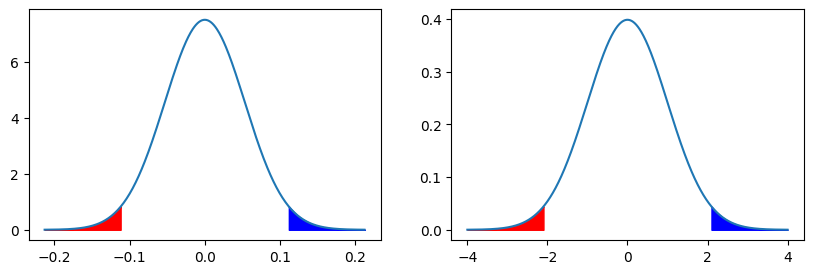

In [23]:
TwoProportionTest(x1=87,n1=100,x2=91,n2=120,CIs=[0.90,0.95,0.99])

The hypothesis test tries to infer whether the sample proportions difference $\hat{p}_1 - \hat{p}_2 = 0.87 - 0.758 = 0.112$ is significantly different from the claimed null hypothesis difference of 0.

The samples of students are assumed to be simple random samples, so the observations are *independent* within groups, and the samples themselves are independent from each other. Also, the code above shows that $n_1 p_{pool}, n_1(1 - p_{pool}), n_2 p_{pool}, n_2(1 - p_{pool})$ are all at least 10, so success/failure conditions are satisfied.

Therefore, according to the CLT, the sampling distribution of $\hat{p}_1 - \hat{p}_2$ (**null distribution**) is normal with mean: $\mu = p_1 - p_2 = 0$ and standard deviation given by
$SE = \sqrt{p_{pool}(1 - p_{pool})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}$
(see the code as well as the left plot of the Figure above).

The **p-value** is the probability of seeing the observed sampling proportion difference or something even more extreme under the bell-shaped normal null distribution. The $z$ corresponding to $\hat{p}_1 - \hat{p}_2$ is:

$$z = \frac{\hat{p}_1 - \hat{p}_2 - 0}{SE} = \frac{0.87 - 0.758}{0.053} = \frac{0.112}{0.053} = 2.098$$

The alternative $H_1 : p_1 - p_2 \ne 0$ is two-sided, so both tails add up to $p$-value = 0.0358687 > 0.01 = $\alpha$, as shown in the figures above. Thus, there is not enough evidence to reject the initial assumption $H_0 : p_1 - p_2 = 0$ at the more strict 1% level. Therefore, we cannot reject the claim of an equal proportion of MCAT passing with the two prep guides. However, if a 5% significance level was applied, then the same $p$-value < 0.05 and we would have rejected the equality of population proportions.

In the confidence interval computations, the success/failure conditions and standard error are computed using $\hat{p}_1$ and $\hat{p}_2$. The code above shows that $n_1 \hat{p}_1, n_1(1 - \hat{p}_1), n_2 \hat{p}_2, n_2(1 - \hat{p}_2)$ are all 10 or more, so the success/failure conditions are satisfied.

Therefore, the confidence interval for the difference of population proportions $p_1 - p_2$ is:

$$\hat{p}_1 - \hat{p}_2 \pm z^* \cdot SE = 0.87 - 0.758 \pm 2.576 \cdot 0.052 = 0.112 \pm 0.132 = (-0.021, 0.244)$$

Therefore, we are 99% confident (1% significance error) that the true population proportion difference is between −2.11% and 24.45%, which contains the claimed $H_0 : p_1 - p_2 = 0$, confirming *not* rejecting $H_0$. Once again, the 95% CI (1.06%, 21.27%) does *not* contain 0, so we would have rejected $H_0$.

**Example**

In this example, we look again at the substance abusers dataset. We want to investigate if the proportions of people who got treatment are different in homeless vs. housed patients. Is there a significant difference at the 5% level? How about a 10% level?

$\bm{H_0} : p_1 - p_2 = 0$ (no difference in proportions - **assume true**)

$\bm{H_1} : p_1 - p_2 \ne 0$ (there is a difference in proportions)

In [ ]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url)

# Note pd.crosstab() is used to cross-tabulate the counts
Om = pd.crosstab(mydata.homeless, mydata.satreat, margins=True)
print(Om)

satreat    no  yes  All
homeless               
homeless  141   68  209
housed    183   61  244
All       324  129  453


Two Proportions Test function
Group 1: number of yes x1 = 68, out of n1 = 209
Group 2: number of yes x2 = 61, out of n2 = 244
Confidence Levels [0.9, 0.95, 0.99] 

H0: p1-p2 = 0
H1: p1-p2 not 0 or one-sided test

sample proportions ph1 = 68/209 = 0.3254
sample proportions ph2 = 61/244 = 0.2500
Hypothesis Testing Approach:
p pooled = pL = (68+61)/(209+244)=0.2848
success-failure conditions n1*pL,n1*(1-pL),n2*pL, n2*(1-pL) >=10??
 59.5166,149.4834,69.4834,174.5166
Standard Error = SE =sqrt(pL*(1-pL)*(1/n1+1/n2)) =
 = sqrt(0.2848(1-0.2848)(1/209+1/244)) = 0.0425
difference phat1-phat2 = 0.3254-0.2500 = 0.0754
Standardized statistic = z = diffphats/SE = 0.0754/0.0425 = 1.7717
P-values: 2-sided = 0.0764485137, 1-sided =0.0382242569

Confidence Interval Approach:
success-failure conditions n1*ph1,n1*(1-ph1),n2*ph2, n2*(1-ph2) >=10??
 68.0000,141.0000,61.0000,183.0000
Standard Error = SEci =sqrt(ph1*(1-ph1)/n1+ph1*(1-ph2)/n2)) =
 = sqrt(0.3254(1-0.3254)/209+0.2500(1-0.2500)/244) = 0.0426
   C

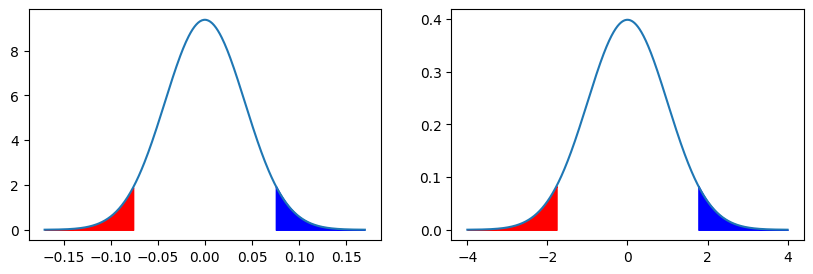

In [25]:
TwoProportionTest(x1=68,n1=209,x2=61,n2=244,CIs=[0.90,0.95,0.99])

The hypothesis test tries to infer whether the sample proportions difference 
$\hat{p}_1 - \hat{p}_2 = 0.325 - 0.25 = 0.075$
is significantly different from the claimed null hypothesis difference of 0. 

The substance abuse patients in each group are assumed to be simple random samples, so the observations are *independent* within groups and the samples themselves are independent of each other. Also, the code above shows that $n_1 p_{pool}, n_1(1 - p_{pool}), n_2 p_{pool}, n_2(1 - p_{pool})$ are all at least 10, so success/failure conditions are satisfied.
Therefore, according to the CLT, the sampling distribution of $\hat{p}_1 - \hat{p}_2$ (**null distribution**) is normal with mean $\mu = p_1 - p_2 = 0$ and standard deviation given by
$SE = \sqrt{p_{pool}(1 - p_{pool})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}$
(see the calculations and the left plot of the Figure above)

The **p-value** is the probability of seeing the observed sampling proportion difference or something even more extreme under our bell-shaped normal null distribution. The $z$ corresponding to $\hat{p}_1 - \hat{p}_2$ is:

$$z = \frac{\hat{p}_1 - \hat{p}_2 - 0}{SE} = \frac{0.325 - 0.25}{0.043} = \frac{0.075}{0.053} = 1.772$$

Given the two-sided nature of the alternative $H_1 : p_1 - p_2 \ne 0$, we have to account for both left and right tails. The areas in these tails add up to the final $p$-value = 0.0764485 > 0.05 = $\alpha$, as shown in the figures above. Thus, we conclude that there is *not* enough evidence to reject the initial assumption $H_0 : p_1 - p_2 = 0$ at the 5% level, i.e., not rejecting the claim of an equal proportion of patients getting treatment in homeless vs. housed population.
Note that if we apply a 10% significance level, then the same $p$-value < 0.10 and our conclusion is the opposite — there is enough evidence to reject the equality of the two population proportions.

For the confidence interval computations, the success/failure conditions and standard error are computed using $\hat{p}_1$ and $\hat{p}_2$. The code above shows that $n_1 \hat{p}_1, n_1(1 - \hat{p}_1), n_2 \hat{p}_2, n_2(1 - \hat{p}_2)$ are all 10 or more, so the success/failure conditions are satisfied.
Therefore, the confidence interval for the difference of population proportions $p_1 - p_2$ is:

$$\hat{p}_1 - \hat{p}_2 \pm z^* \cdot SE = 0.325 - 0.25 \pm z^* \cdot 0.0426 = 0.075 \pm z^* \cdot 0.0836$$

Thus, we are 95% confident (for 5% significance error rate) that the true population proportion difference is between −0.82% and 15.89%, which contains the claimed $H_0 : p_1 - p_2 = 0$. This confirms our conclusion *not* to reject $H_0$ at the 95% level. However, the 90% CI given by (0.52%, 14.55%) does not contain 0 and leads to the rejection of $H_0$.